In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [8]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

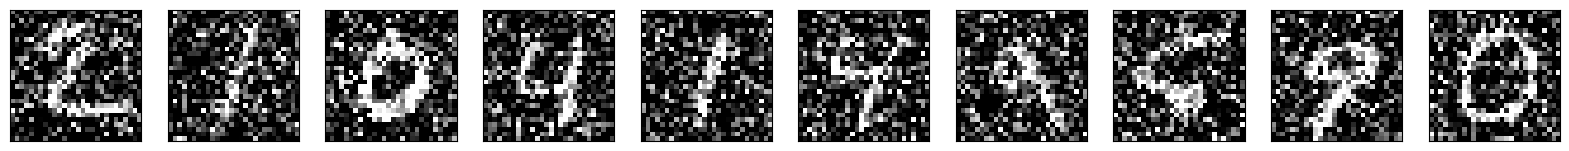

In [9]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)




In [11]:
print('Name: SWETHA S           Register Number: 212222230155       ')
autoencoder.summary()

Name: SWETHA S           Register Number: 212222230155       


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 184s 388ms/step - loss: 0.2341 - val_loss: 0.1154
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 382ms/step - loss: 0.1129 - val_loss: 0.1063


In [14]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


Name: SWETHA S          Register Number: 212222230155


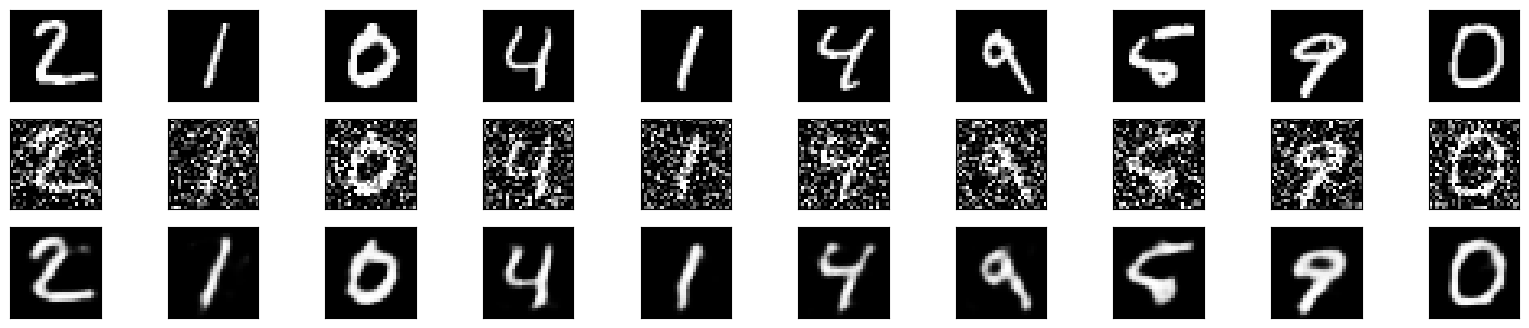

In [15]:
n = 10
print('Name: SWETHA S          Register Number: 212222230155')

plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original images
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [16]:
history = autoencoder.fit(x_train_noisy, x_train_scaled,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 177s 752ms/step - loss: 0.1056 - val_loss: 0.1031
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 181s 771ms/step - loss: 0.1039 - val_loss: 0.1021
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 195s 741ms/step - loss: 0.1024 - val_loss: 0.1008
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 203s 746ms/step - loss: 0.1016 - val_loss: 0.0999
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 740ms/step - loss: 0.1007 - val_loss: 0.0992
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 201s 738ms/step - loss: 0.0998 - val_loss: 0.0987
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 174s 743ms/step - loss: 0.0994 - val_loss: 0.0983
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 736ms/step - loss: 0.0986 - val_loss: 0.0977
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 202s 737ms/step - loss: 0.0984 - val_loss: 0.0973
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 202s 738ms/step - loss: 0.0978 - val_loss: 0.0968
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 203s 743ms/step - loss: 0.0974 - val_loss: 0.0966
Epoch 12

In [17]:
import pandas as pd

Text(0.5, 1.0, 'Training Loss vs. Validation Loss\nSWETHA S - 212222230155')

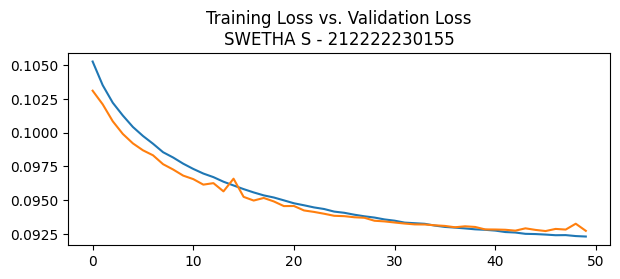

In [19]:
metrics=pd.DataFrame(autoencoder.history.history)
plt.figure(figsize=(7,2.5))
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss\nSWETHA S - 212222230155')